# 2. Дослідницький аналіз даних

## 2.1. Мета дослідження даних
Дослідницький аналіз даних (EDA) - це важливий етап, який необхідно проводити після отримання даних, і його слід робити перед моделюванням. Науковцю необхідно розуміти природу даних, не роблячи припущень. Результати дослідження даних можуть бути надзвичайно корисними для розуміння їх структури, розподілу значень, визначення граничних значень та взаємозв'язків.
> **Мета EDA:**
* використовувати зведені статистичні дані та візуалізації для кращого розуміння даних, знаходити тенденції та  формулювати гіпотези аналізу;
* для успішної попередньої обробки даних важливо мати загальне уявлення про наявні дані.
Основні статистичні описи можуть бути використані для ідентифікації властивостей даних.

Наступним етапом є вивчення даних. Для вивчення даних використовуються два підходи:

1. ***Описова статистика*** - це процес конденсації ключових характеристик набору даних у прості числові показники. Деякі поширені показники - це середнє значення, стандартне відхилення та кореляція.

2. ***Візуалізація*** - це процес проектування даних або їх частин у декартовому просторі або в абстрактних зображеннях. Процес обробки даних використовується на багатьох етапах, включаючи попередню обробку, моделювання та інтерпретацію результатів.

## 2.2. Описова статистика
Зведена статистика - це вимірювання, призначені для опису даних. У галузі описової статистики існують наступні [підсумкові вимірювання](http://www.saedsayad.com/numerical_variables.htm)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Підключення бібліотек для обробки даних
import pandas as pd # обробка даних, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # візуалізація


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [5]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head(2)

In [6]:
# базова описова статистика
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

> Результат відхилень показує позитивне (праве) або негативне (ліве) відхилення. Значення ближчі до нуля показують менші відхилення.
З графіку видно, що **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean** та **concave_points_mean** корисні у прогнозуванні типу раку шляхом чіткого групування доброякісних та злоякісних утворень за цими ознаками. **area_worst** і **perimeter_worst** можуть бути також досить корисними.

In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
# Групування за діагнозом та перевірка результатів
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


Див. бінарне кодування в розділі 1 Problem Identification, щоб підтвердити перетворення категорійних даних діагнозу в числові, де:
* Злоякісна = 1
* Доброякісна = 0

##### **Результати спостережень**
> *357 випадків - доброякісні утворення та 212 випадків - злоякісні утворення*

## 2.3. Унімодальна візуалізація даних

Однією з головних цілей візуалізації даних є спостереження, які особливості є найбільш корисними при прогнозуванні злоякісних або доброякісних ракових утворень. Інша полягає в тому, щоб побачити загальні тенденції, які можуть допомогти у виборі моделі та підборі гіперпараметрів.

Використовуючи наступні інструменти візуалізації можна зрозуміти значення кожної ознаки з набору даних для діагностування раку:
* Histograms.
* Density Plots.
* Box and Whisker Plots.

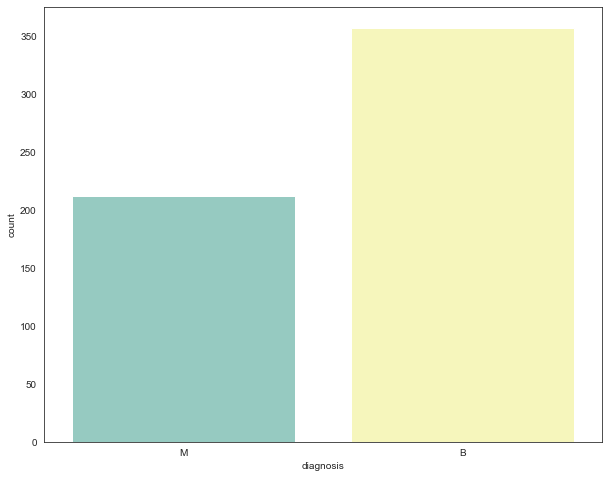

In [11]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

### Розділення стовпчиків на менші фрейми для виконання візуалізації

In [15]:
# Розбиття стовпчиків на групи відповідно до їх суфіксів 
#(_mean, _se, and __worst). 
# Прив'язка до 'ID' та 'Diagnosis'
data_id_diag=data.loc[:,["id","diagnosis"]]
data_diag=data.loc[:,["diagnosis"]]

data_mean=data.iloc[:,1:11]
data_se=data.iloc[:,11:22]
data_worst=data.iloc[:,23:]

print(data_id_diag.columns)
print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')
Index(['perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Гістограма за суфіксом "_mean"

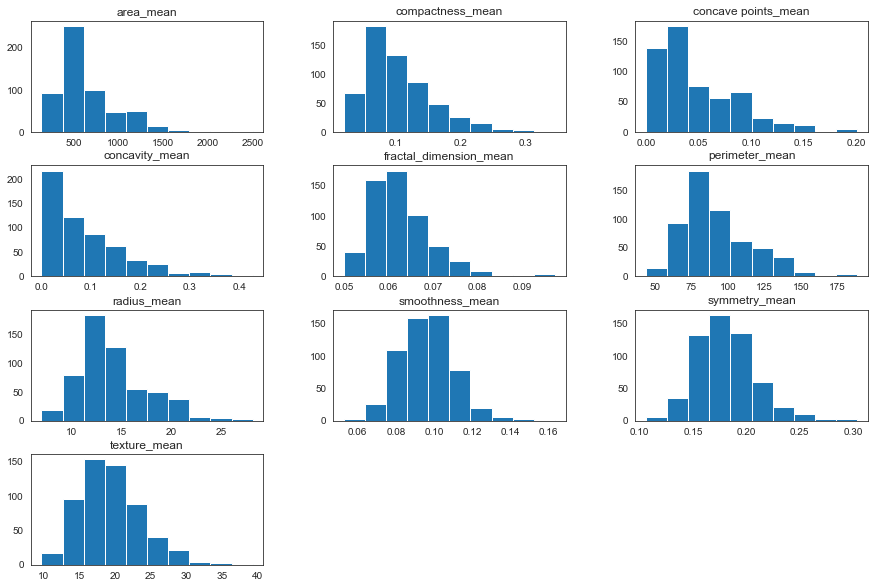

In [18]:
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

### Гістограма за суфіксом "_se"

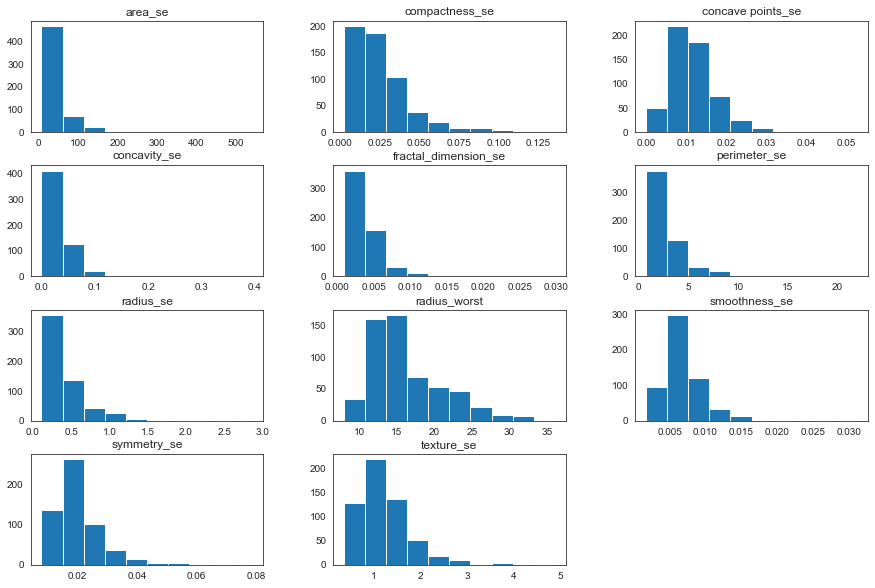

In [19]:
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Гістограма за суфіксом "_worst"

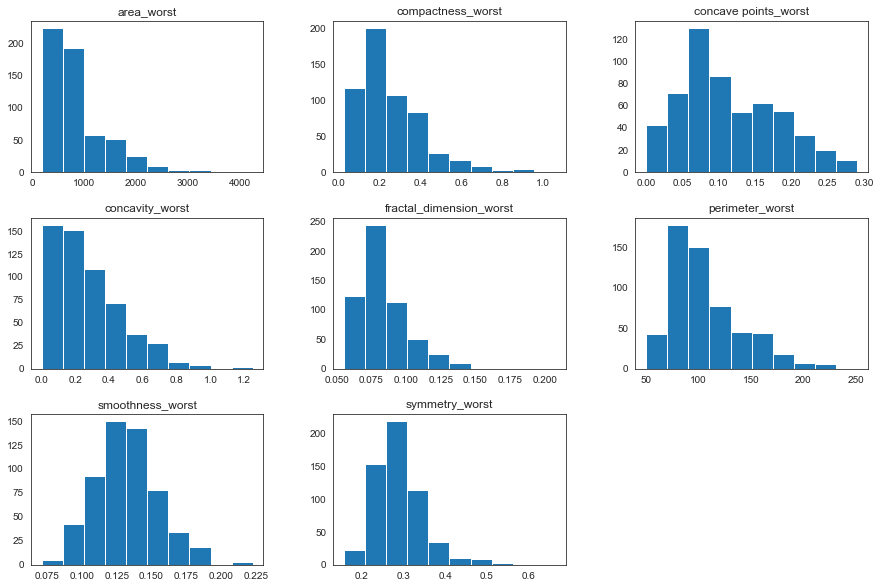

In [20]:
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

З гістограм видно, що атрибути **concavity** та **concavity_point** можуть мати експоненціальний розподіл. Також видно те, що атрибути **texture**, **smoothness** та **symmetry** можуть мати гауссовий або майже гауссовий розподіл. Це цікаво тим, що більшість методик машинного навчання передбачають універсальний розподіл Гаусса на вхідних змінних.

### Візуалізація розподілу даних за допомогою графіків щільності

### Графіки щільності для суфіксу "_mean"

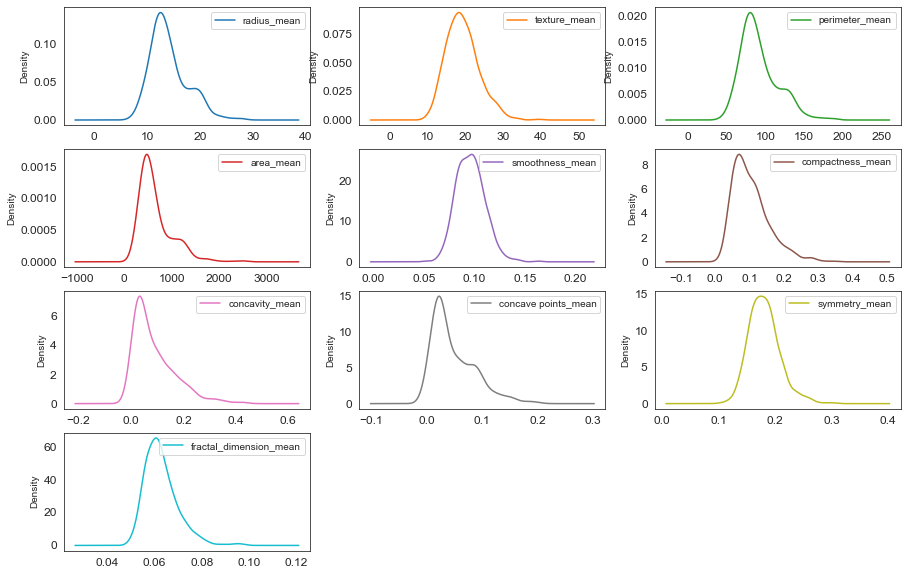

In [21]:
#Density Plots
plt = data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

### Графіки щільності для суфіксу "_se"

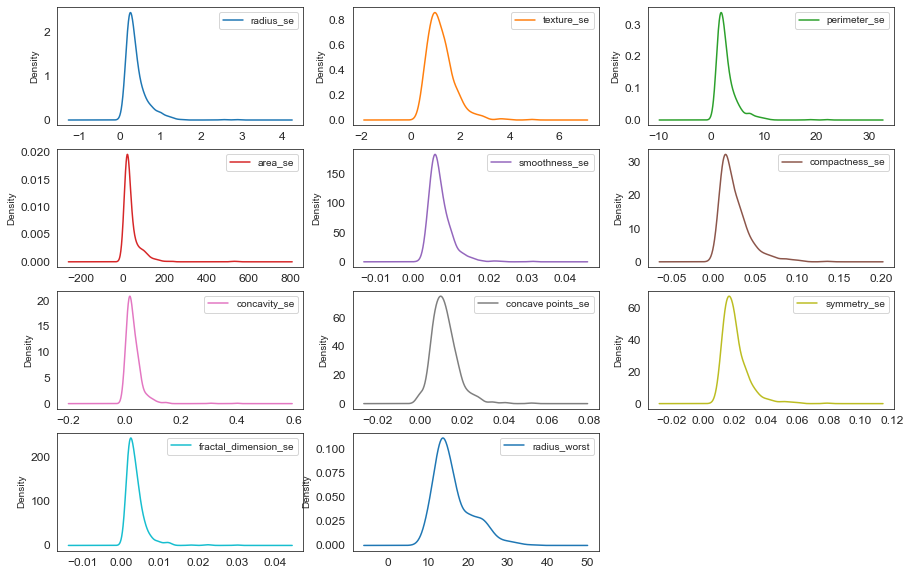

In [22]:
#Density Plots
plt = data_se.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

### Графіки щільності для суфіксу "_worst"

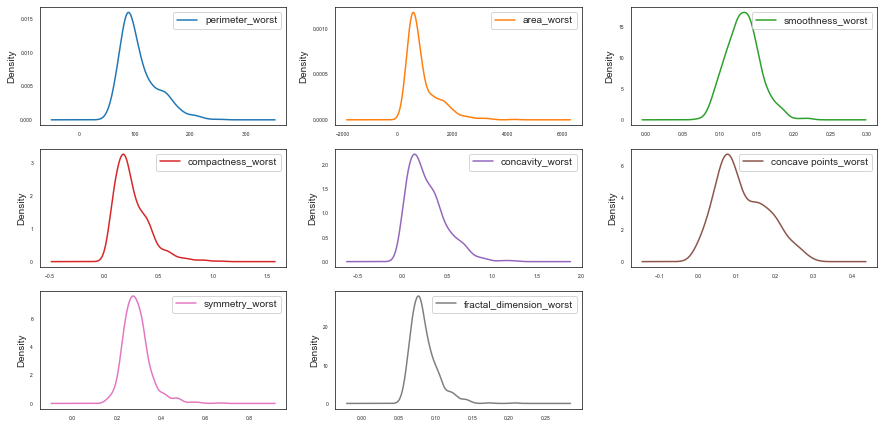

In [23]:
#Density Plots
plt = data_worst.plot(kind='kde', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=5, figsize=(15,10))

З даних графіків видно, що атрибути **perimeter**, **radius**, **area**, **concavity**, **compactness** можуть мати експоненціальний розподіл. Атрибути **texture**, **smoothness** та **symmetry** можуть мати гауссовий або майже гауссовий розподіл. Це цікаво тим, що більшість методик машинного навчання передбачають універсальний розподіл Гаусса на вхідних змінних.

### Візуалізація розподілу даних за допомогою коробкового графіку (box plot)

### Box plot суфіксу "_mean"

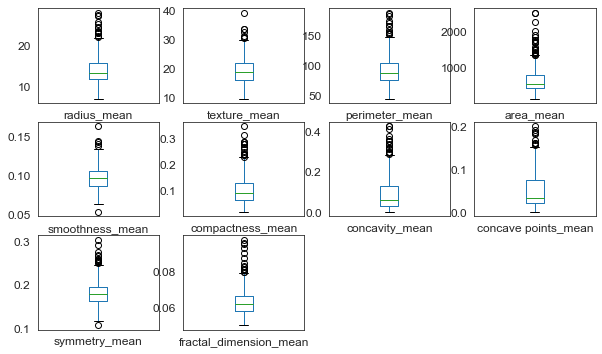

In [24]:
# box and whisker plots
plt=data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12)

### Box plot суфіксу "_se"

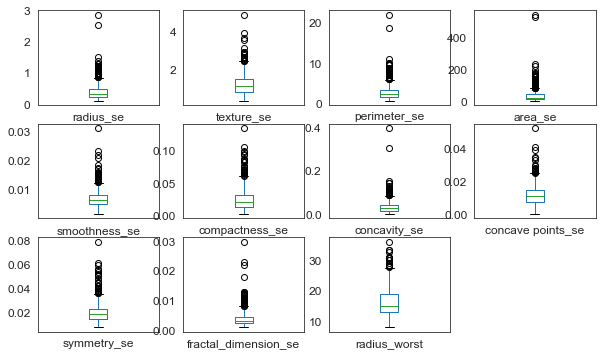

In [25]:
# box and whisker plots
plt=data_se.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12)

### Box plot суфіксу "_worst"

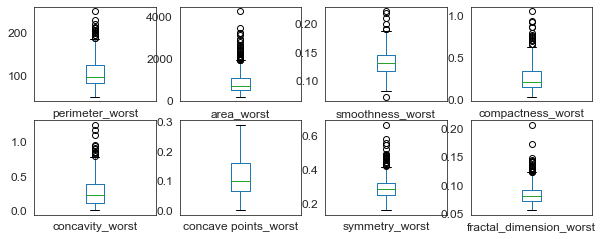

In [26]:
# box and whisker plots
plt=data_worst.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12)

З даних графіків видно, що атрибути **perimeter**, **radius**, **area**, **concavity**, **compactness** можуть мати експоненціальний розподіл. Атрибути **texture**, **smoothness** та **symmetry** можуть мати гауссовий або майже гауссовий розподіл. Це цікаво тим, що більшість методик машинного навчання передбачають універсальний розподіл Гаусса на вхідних змінних.

## 2.4. Мультимодальна візуалізація даних
* Точкова діаграма
* Кореляційна матриця

### Кореляційна матриця

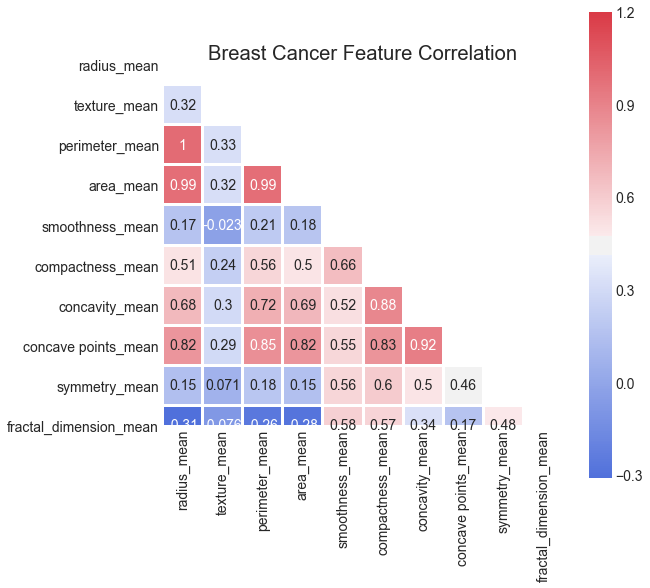

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)

# розрахунок кореляційної матриці
corr = data_mean.corr()

# генерація маски
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# фігура matplotlib
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# карта кольорів
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# теплова карта за допомогою маски та виправлення співвідношення сторін
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, ax=ax,annot=True, fmt='.2g',linewidths=2)

З результатів вище видно, що існує сильна позитивна залежність між параметрами середніх значень в діапазоні \[1-0,75\];
* Середня площа ядра тканини (**area_mean**) має сильну позитивну кореляцію із середніми значеннями радіуса (**radius_mean**) та периметра (**perimeter_mean**);
* Деякі параметри мають середньо-позитивний кореляційний характер (r в діапазоні (0,5-0,75)) - це увігнутість (**concavity**) та площа (**area**), увігнутість (**concavity**) та периметр (**perimeter**) тощо;
* Аналогічно прослідковується сильна негативна кореляція між фрактальним розміром (**fractal_dimension**) та середніми значеннями радіусу (**radius_mean**), текстури (**texture_mean**).

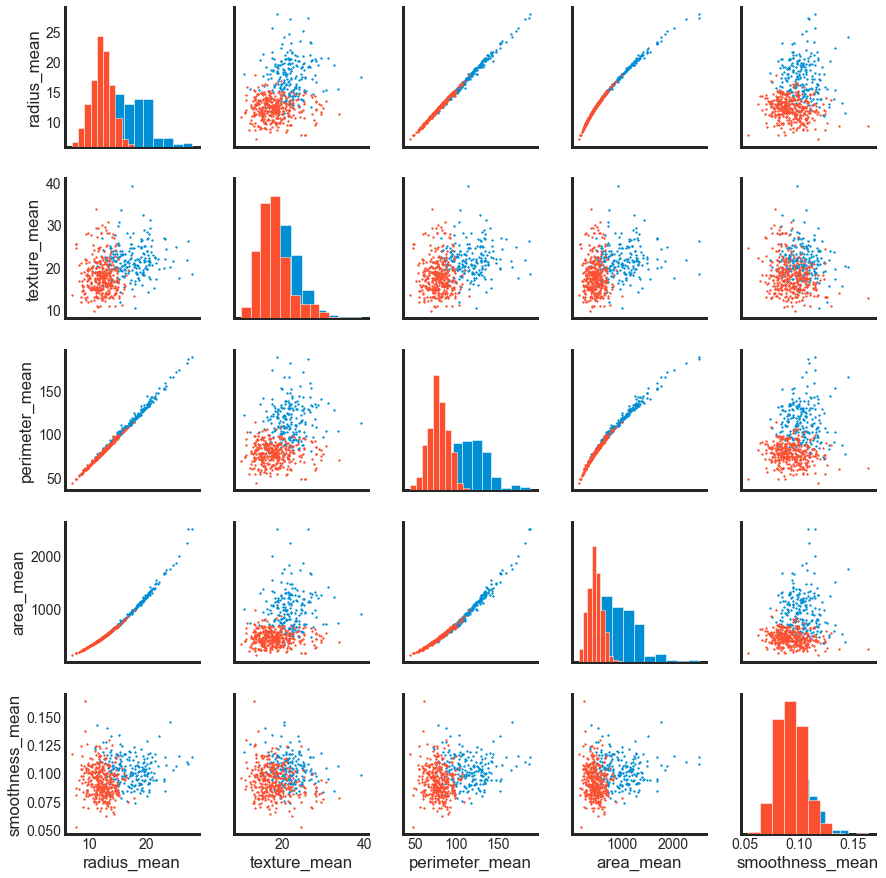

In [28]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                       data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

### Висновок

* середні значення радіусу (**radius_mean**), периметра (**perimeter_mean**), площі (**area_mean**), компактності (**compactness_mean**), увігнутості (**concavity_mean**) та увігнутих точок (**concave_points_mean**) можуть бути використані для класифікації раку. Більші значення цих параметрів мають тенденцію виявляти кореляцію зі злоякісними пухлинами.

* середні значення текстури (**texture_mean**), гладкості (**smoothness_mean**), симетрії (**symmetry_mean**) чи фрагментарності (**fractal_dimension_mean**) не показують особливої переваги у визначенні доброякісних/злоякісних пухлин.